<center><p style="font-size:30px">Quantum Circuits and Devices / Laboratory 1</p></center>
<center><p style="font-size:30px">Introduction to Qiskit</p></center>

# Table of Contents <a class="anchor" id="building-quantum-circuits"></a>

1. [Building quantum circuits](#building-quantum-circuits)
2. [Simulating quantum circuits](#simulating-quantum-circuits) 
3. [Multiple-qubit circuits](#multiple-qubit-circuits)
4. [Analyzing quantum circuits](#analyzing-quantum-circuits)
5. [Simulating quantum hardware](#simulating-quantum-hardware)
6. [Running circuits on quantum hardware](#running-circuits)

In this laboratory, we will introduce the Qiskit environment and familiarize with common instructions and commands to operate a quantum circuit. 

In [1]:
%pip install qiskit qiskit-ibm-runtime qiskit_aer 
%pip install matplotlib pylatexenc seaborn

  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.20
    Uninstalling urllib3-1.26.20:
      Successfully uninstalled urllib3-1.26.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.29.76 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
!brew install poppler

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:4ffc8607e08e9bd536f1df71643b2ecb4cea1a15be9226f297008bc34d0bc8e2
######################################################################### 100.0%                                        29.2%                                          34.2%##################             85.5%############          89.1%
==> Pouring portable-ruby-3.3.7.el_capitan.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
acronym                    heroku                     prism-cli
alive2                     hevi                       proxyfor
asciigen                   hgrep                      pscale
atac                       html2markdown              ratify
azure-storage-blobs-c

# Building quantum circuits <a class="anchor" id="building-quantum-circuits"></a>
In Qiskit, circuits are represented by `QuantumCircuit` objects, which are initialized by specifying the number of quantum bits (qubits) and classical bits (cbits). Let's begin with a circuit using 1 qubit. The method `.draw(plotter)` can be used to draw the circuit using either a graphical plotter (`.draw("mpl")`), an inline plotter (`.draw("text")`), or a high-quality TeX-based plotter (`.draw("latex")` or `.draw("latex_source")` for LaTeX source code). 

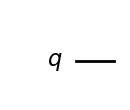

In [2]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,0); 
circ.draw("mpl")

We can add gates to our quantum circuit by calling the corresponding method on the `QuantumCircuit` object: for a complete list, see the [`QuantumCircuit` API Reference](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html). Common single-qubit gates include:
- Hadamard gate: `.h(qubit)` where `qubit` is the target qubit (integer)
- NOT ($X_\pi$) gate: `.x(qubit)` where `qubit` is the target qubit (integer)
- S gate ($Z_{\pi/2}$) gate: `.s(qubit)` where `qubit` is the target qubit (integer)
- $X_\theta$ gate: `.rx(theta,qubit)` where `theta` is the rotation angle in radians (float) and `qubit` is the target qubit (integer)
- $Y_\theta$ gate: `.ry(theta,qubit)` where `theta` is the rotation angle in radians (float) and `qubit` is the target qubit (integer)
- $Z_\theta$ gate: `.rz(theta,qubit)` where `theta` is the rotation angle in radians (float) and `qubit` is the target qubit (integer)

As an example, let's add a Hadamard gate. 

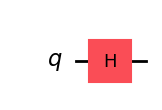

In [3]:
circ.h(0);        # add Hadamard gate to q0
circ.draw("mpl")

# Simulating quantum circuits <a class="anchor" id="simulating-quantum-circuits"></a>
We can simulate the operation of a quantum circuit by using the `Statevector` object of the `quantum_info` module. We first initialize the `Statevector` object to our desired state. The `Statevector` object can be constructed by passing a $2^n$-element list (where $n$ is the number of qubits) representing the corresponding coefficients $\alpha$. Our example is using just 1 qubit, and we initialize it to $|0\rangle$. We can represent the state in the usual bra-ket notation using the `.draw("latex")` method. 

In [15]:
import numpy as np
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import Statevector
circ = QuantumCircuit(1)
circ.h(0)
circ.draw("text")
state = Statevector([1,0]);     # coefficients for |0>, |1>
state.draw("text")

[1.+0.j,0.+0.j]

Applying the quantum circuit defined by `circ` to our `Statevector` requires using the `.evolve(circuit)` method, where `circuit` is the `QuantumCircuit` object. 

In [16]:
state = state.evolve(circ)
state.draw("latex")

<IPython.core.display.Latex object>

As expected, the output state of the circuit corresponds to $|+\rangle$. We can similarly evaluate the output state vector when the qubit is initialized in the $|1\rangle$ state as: 
skit offers a wide variety of graphic visualizations for the state vectors of both single and multiple qubit systems. 

In [17]:
state = Statevector([0,1]).evolve(circ);
state.draw("latex")

<IPython.core.display.Latex object>

Which promptly returns the $|-\rangle$ state as expected. We can visualize the state on the usual Bloch sphere using `.draw("bloch")`:

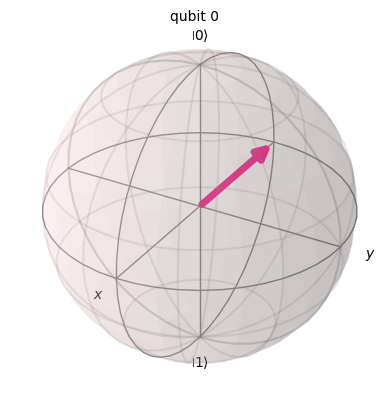

In [7]:
state.draw("bloch")

Qiskit also offers a unique representation known as *Q-Sphere* which is available using `.draw("qsphere")`. In the Q-Sphere, a state is represented by mapping the $|0\rangle$ and $|1\rangle$ components. For each component, the size of the pointer is linked to the measurement probability whereas the color is linked to the phase. When both pointers are present, it means the state is a superposition of $|0\rangle$ and $|1\rangle$. The color of each pointer represents the phase of the corresponding component: for the $|-\rangle$ state, the $|0\rangle$ component has phase $0$ (corresponding to pointer color blue), whereas the $1$ component has phase $\pi$ (corresponding to pointer color yellow). Since both components have the same measurement probability, the pointers have equal size. 

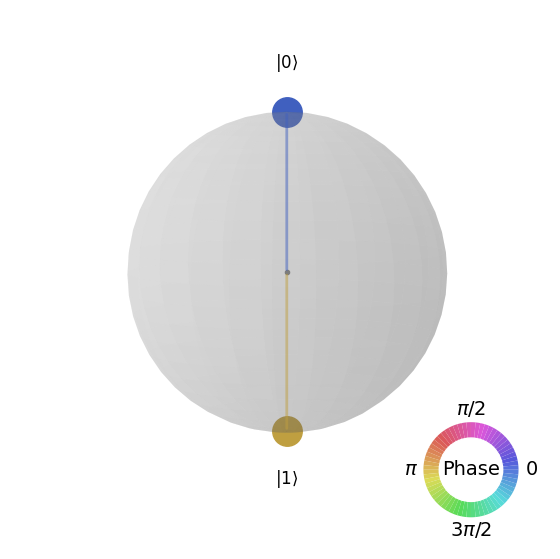

In [8]:
state.draw('qsphere')

Compare the latter with the Q-Sphere for the $|+\rangle$ state, which is similarly an equal-amplitude superposition of $|0\rangle$ and $|1\rangle$, both with phase $0$ (and thus blue color):

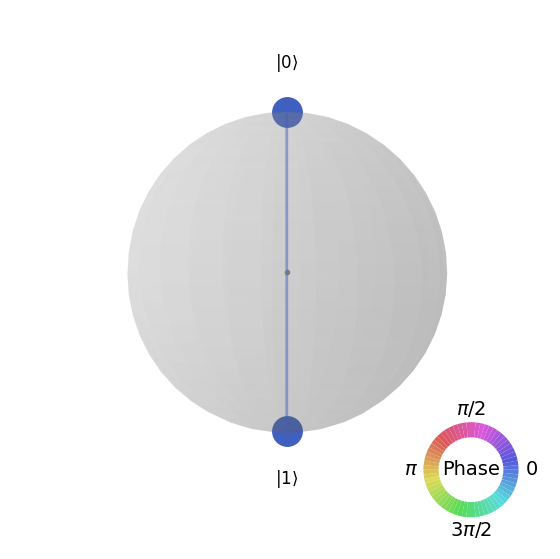

In [9]:
from numpy import sqrt
Statevector([1/sqrt(2),1/sqrt(2)]).draw("qsphere")

Next, we plot the Q-Sphere for a more generic state characterized by $\alpha = \frac{\sqrt 3}{2}$, $\beta = \frac12e^{-i\frac{\pi}{4}}$. In this case, the pointer size for state $|0\rangle$ is three times the pointer size for state $|1\rangle$ since $|\alpha|^2 = \frac34 = 3|\beta|^2 = \frac14$. State $|0\rangle$ is taken as phase reference with $0$ phase, thus yielding a $-\pi/4$ phase for the $|1\rangle$ component (light blue). 

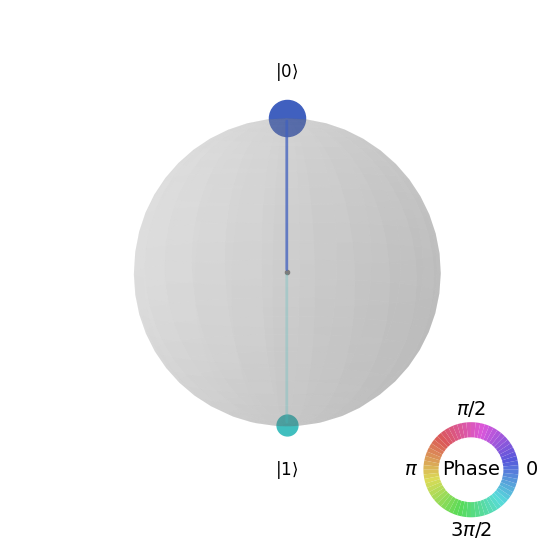

In [18]:
from numpy import sqrt, exp, pi
Statevector([sqrt(3)/2,1/2*exp(-1j*pi/4)]).draw("qsphere")

By default, Qiskit uses the highest-probability component as phase reference, *i.e.* the component with phase $0$. When components have equal amplitude, it defaults to $|0\rangle$. Thus, for the state characterized by $\alpha = \frac 12$, $\beta = \frac{\sqrt 3}{2}e^{-i\frac{\pi}{4}}$, the Q-Sphere has pointer $|1\rangle$ three times larger than pointer $|0\rangle$ and phase reference coinciding with component $|1\rangle$. This is equivalent to applying a global phase shift of $e^{i\frac{\pi}{4}}$: in this phase frame, the $|0\rangle$ component now has a $+\pi/4$ phase, corresponding to color purple. 

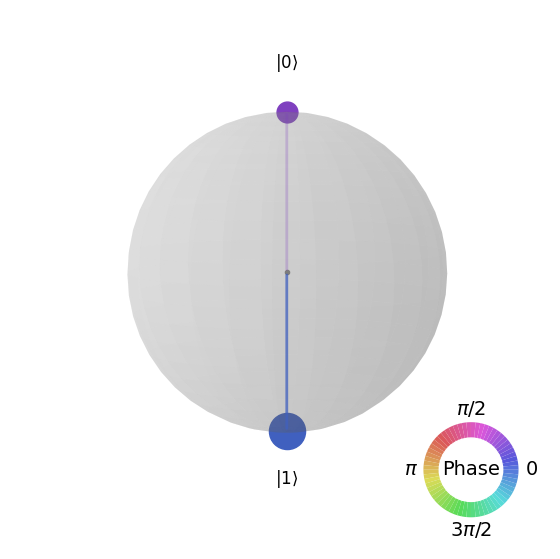

In [11]:
Statevector([1/2,sqrt(3)/2*exp(-1j*pi/4)]).draw("qsphere")

# Multiple-qubit circuits <a class="anchor" id="multiple-qubit-circuits"></a>
The main power of quantum computing lies in its possibility to simultaneously manipulate superposition of multiple qubits, *i.e.* exploring a *space* of inputs, and provide a corresponding *space* of outputs or solutions. Notice that this manipulation requires, theoretically, a single-run of a single quantum circuits: this is in stark contrast with a classical system, where to perform the same task we must either use multiple runs of a single circuit, or a single run of multiple circuits. As an introduction to multiple-qubit quantum circuits and their treatment in Qiskit, we consider the circuit of Exercise 4 of Exercise Class 2.

The circuit operates on a two-qubit register, where a first set of gates comprises an Hadamard gate on qubit $|\psi_1\rangle$ and a NOT gate on qubit $|\psi_2\rangle$, followed by a CNOT gate with control $|\psi_1\rangle$ and target $|\psi_2\rangle$. Starting from the first set of gates, we thus write: 

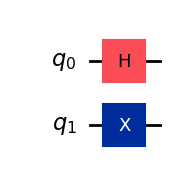

In [19]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(2,0);  # initialize quantum circuit with 2 qubits and 0 cbits
circ.h(0);                   # add Hadamard gate on q0, corresponding to psi1 in EXC2-Exercise 4
circ.x(1);                   # add NOT gate on q1, corresponding to psi2 in EXC2-Exercise 4
circ.draw("mpl")

Notice that, in absence of specific instructions, gates added to separate qubits always start from the first available timeslot. To apply the CNOT gate, we use the `.cx(control,target)` method of `QuantumCircuit`, where `control` and `target` are integer values representing the indices of the control and target qubit respectively.

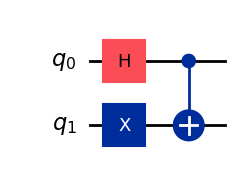

In [20]:
circ.cx(0,1); 
circ.draw("mpl")

Let us now study the evolution of the state vector starting from the $|10\rangle$ state as in Exercise Class 2, Exercise 4. We will then issue: 

In [21]:
from qiskit.quantum_info import Statevector
state = Statevector([0,0,1,0]); 
state = state.evolve(circ);
state.draw("latex")

<IPython.core.display.Latex object>

Similarly to what we found in class, the output state is the first Bell state $|\Phi^+\rangle$. Let's try to visualize the state using the Bloch sphere representation, one for each qubit of the system. 

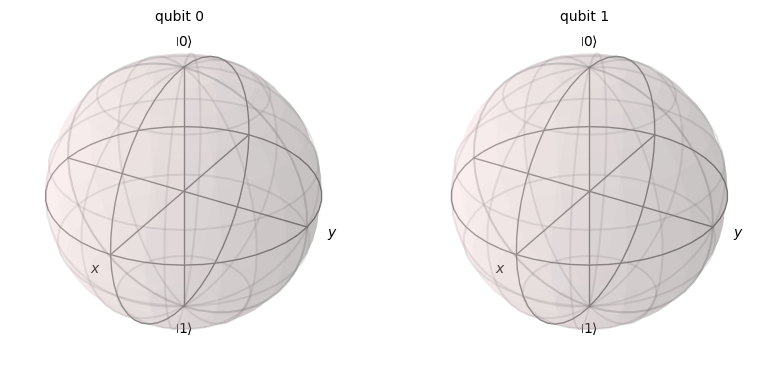

In [22]:
state.draw("bloch")

Notice that Qiskit returns empty Bloch spheres. This is due to the state being *entangled*, which does not allow separation into the tensor product of two distinct qubits. In contrast, a *product* or *composite* state of $n$ qubits can be visualized using $n$ Bloch spheres since the qubit states are separable. Let's represent, for example, the product state $|0\rangle|1\rangle = |01\rangle$. 

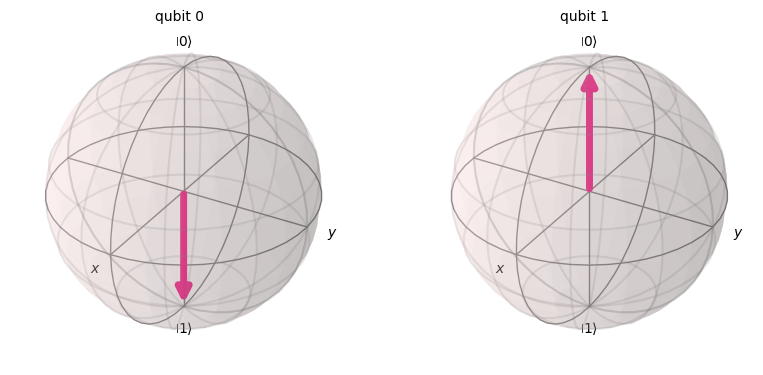

In [23]:
Statevector([0,1,0,0]).draw("bloch")

Since the state is a product state, a full visualization is possible using the Bloch spheres. On the other hand, the Q-Sphere representation is suitable for both entangled and product states. In this case, we will have a pointer for each of the possible states of our quantum register. Similarly to the single-qubit case, each pointer size is associated with the corresponding measurement probability, and the color is associated with the phase. In the $|\Phi^+\rangle$ state provided by our quantum circuit, the $|00\rangle$ and $|11\rangle$ state have equal probability and same $0$ phase, resulting in pointers of the same size and with same color (blue): 

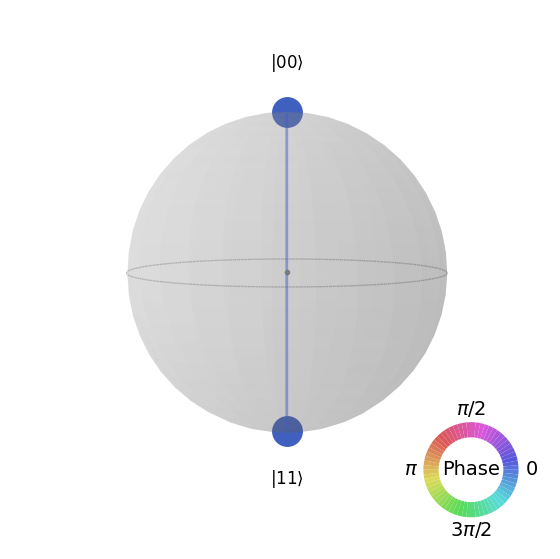

In [17]:
state.draw("qsphere")

The Q-Sphere representation is more compact (and useful) for increasing number of qubits: 

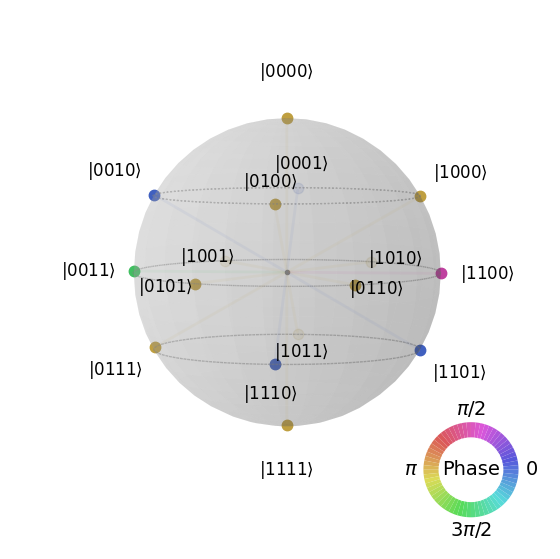

In [24]:
from numpy import sqrt
Statevector([1,-1,-1,1j,1,1,1,1,1,1,1,1,-1j,-1,-1,1]/sqrt(16)).draw("qsphere")

# Analyzing quantum circuits <a class="anchor" id="analyzing-quantum-circuits"></a>

The `Operator` class is a powerful tool of the `quantum_info` module allowing us to gain deeper insight on our quantum circuits by providing a representation of operators. Objects of the `Operator` class can be instantiated from: 
- a `QuantumCircuit` object, in which case they represent the equivalent unitary operator associated with the circuit
- a `Gate` object, in which case they represent the equivalent unitary operator associated with the corresponding quantum gate
- a numeric matrix. 

Let's instantiate the equivalent unitary operator associated with the circuit by passing our `QuantumCircuit` to the class constructor:

In [27]:
from qiskit.quantum_info import Operator
O = Operator(circ);
print(O)

Operator([[ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


The `data` property stores our usual matrix-based representation of the operator with respect to the circuit's endianness:

In [28]:
print(O.data)

[[ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


The `Operator` class also allows to define custom gates which can then be added to `QuantumCircuit` objects. In Exercise Class 2, we computed the operator matrix for a gate with truth table:
<table>
    <tr align="center"><td bgcolor="34696D" width="100">Ψin</td><td bgcolor="34696D" width="100">Ψout</td></tr>
    <tr align="center"><td>|0></td><td>|-></td></tr>
    <tr align="center"><td>|1></td><td>|+></td></tr>
</table>
which yielded the operator matrix: 

\begin{equation} \hat{O} = \frac{1}{\sqrt 2}\begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix} \end{equation} 

We can build an `Operator` object with $\hat{O}$ unitary matrix by issuing: 

In [29]:
from numpy import matrix
custop = Operator(1/sqrt(2) * matrix([[1,1],[-1,1]]));

The custom operator can be added to a `QuantumCircuit` object using the `.append(operator,qubits)` method. The `operator` argument is, indeed, our `Operator` instance, whereas the `qubits` argument is a list containing the qubits the gate is applied to. As an example, we build a quantum circuit analogous to Exercise Class 2, Exercise 4 where we replace the Hadamard gate on $|\psi_1\rangle$ with our custom operator.

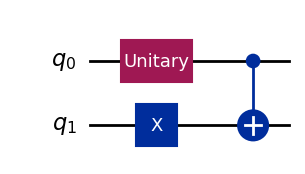

In [30]:
from qiskit import QuantumCircuit
circ1 = QuantumCircuit(2,0); 
circ1.append(custop,[0]); 
circ1.x(1); 
circ1.cx(0,1);
circ1.draw("mpl")

We can verify that the preceding circuit matches the "unrolled" circuit where we exploit our knowledge of $\hat O = \hat H \hat X$. Let us instantiate this "unrolled" circuit: 

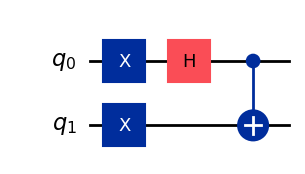

In [4]:
from qiskit import QuantumCircuit
circ2 = QuantumCircuit(2,0); 
circ2.x(0); 
circ2.h(0); 
circ2.x(1); 
circ2.cx(0,1); 
circ2.draw("mpl")

We can compare the equivalent unitary matrices for the two circuit with the `==` operator.

In [32]:
op1 = Operator(circ1); 
op2 = Operator(circ2); 
op1 == op2

True

Notice that the `==` operator executes an exact comparison, *i.e.* it checks if the two operator matrices are elementwise equal. However, we know that two operators may differ by a global phase factor which however does not affect the measurement result. To check for equality aside from a global phase factor, we can use the `process_fidelity()` function of the `quantum_info` module. The output is a scalar between $0$ and $1$, representing a "closeness" measurement between the two operators.

In [33]:
from numpy import exp, pi
from qiskit.quantum_info import process_fidelity

op3 = exp(1j*pi/4)*op2;            # op3 is equal to op2 aside from a pi/4 global phase
F = process_fidelity(op3,op1) 
print(f'Process fidelity (op3,op1) = {F:.5f}, op3 == op1: {op3 == op1}')

Process fidelity (op3,op1) = 1.00000, op3 == op1: False


The `Operator` class also allows us to perform basic linear algebra between operator matrices. Particularly, for instances `A`, `B` of the `Operator` class: 
- `A.tensor(B)` corresponds to the tensor product $A\otimes B$
- `A.expand(B)` corresponds to the tensor product $B\otimes A$
- `A.compose(B)` corresponds to the matrix product $B\cdot A$
- `A.compose(B,front=True)` corresponds to the matrix product $A\cdot B$

As an example, let us consider the circuit from Exercise Class 2, Exercise 4, which is currently stored in the `circ` variable:

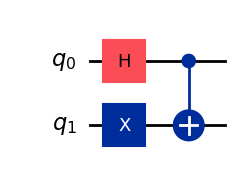

In [26]:
circ.draw("mpl")

In the exercise class, we have shown that the equivalent unitary for this circuit is given by: 
\begin{equation}
\hat O = \hat{CNOT}_{01} \cdot \hat{O}_1 = \hat{CNOT}_{01} \cdot (\hat X \otimes \hat H)
\end{equation}
Let's check this equivalence using the methods from the `Operator` class. Instead of entering the individual matrices for the $\hat H$, $\hat X$, and $\hat{CNOT}$ operators, we can instantiate `Operator` objects from objects of the `Gate` class, which represent quantum gates. Notice that, differently from the `.cx()` method of `QuantumCircuit`, which allows to specify the control and target qubits, the `CXGate` class has a fixed ordering where the least and most significant qubits are the control and target qubits respectively.

In [34]:
from qiskit.circuit.library import HGate, XGate, CXGate

h = Operator(HGate());
x = Operator(XGate());
cx = Operator(CXGate());

Applying the `.compose()` and `.tensor()` methods allows us to compute the equivalent unitary and compare to the one obtained by instantiating an `Operator` directly from the `QuantumCircuit`.

In [35]:
U = x.tensor(h).compose(cx);
U == Operator(circ)

True

# Simulating quantum hardware <a class="anchor" id="simulating-quantum-hardware"></a>
The `Statevector` and `Operator` class allow us to perform simulation of quantum circuits and study their behavior in the quantum domain. However, in real quantum hardware, the quantum computation always ends with a projective measurement breaking the quantum superposition and bringing the state in the classical domain. Values measured for each qubit, which can be either $0$ or $1$, are then stored in classical bits (cbits) and represent the computation output. Once again, let us consider the circuit in Exercise Class 2, Exercise 4. This time, we will instantiate a `QuantumCircuit` object with 2 qubits and 2 cbits, and use `.initialize()` operations to prepare the qubits in states $|0\rangle$ and $|1\rangle$. 

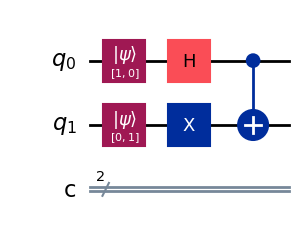

In [37]:
circ = QuantumCircuit(2,2); 
circ.initialize([1,0],0); 
circ.initialize([0,1],1); 
circ.h(0); 
circ.x(1); 
circ.cx(0,1); 
circ.draw("mpl")

Measurement operations can be added to the circuit using the `.measure(qubit,cbit)` method of the `QuantumCircuit` class, where `qubit` is the index of the measured qubit, and `cbit` is the corresponding classical bit where the measurement result will be stored.

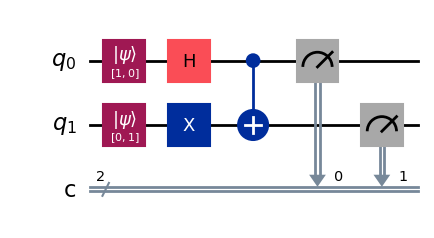

In [38]:
circ.measure(0,0); 
circ.measure(1,1); 
circ.draw("mpl")

The `.measure()` method effectively appends a `Measure` object to our `QuantumCircuit`. While the circuit now more faithfully represents a typical quantum hardware, it is however incompatible with both `Statevector` and `Operator`, since the measurement instruction represents the bridge between the quantum and the classical domain. To simulate quantum circuits including measurement operators, and more in general operators that do not have a matrix definition or decomposition in terms of gate with matrix definitions, Qiskit provides a dedicated simulation backend called `AerSimulator` based on [OpenQASM](https://en.wikipedia.org/wiki/OpenQASM).  

In [6]:
from qiskit_aer import AerSimulator
backend = AerSimulator();

To run a simulation, we use the `.run()` method of the `Backend` class (available for both `BackendV1` and `BackendV2`). The first argument of `.run()` is the quantum circuit we wish to simulate. Additional keyword-argument pairs (kwargs) allow control on additional parameters of the simulation. For example, to characterize a circuit we may wish to execute it repeatedly in order to gain insight on the measurement statistics for each qubit. The `shots` keyword dictates the number of times the circuit is run and is $1024$ by default. Let's run $2000$ simulations of our quantum circuit. 

In [40]:
job = backend.run(circ, shots=2000)

The `.run()` method returns a `Job` object, representing the task we are asking our quantum hardware (*i.e.* the `Backend`) to execute. Since we are using the simulation backend, our job is processed straight away. We can access the results of our simulation by calling the `.result()` method, which provides us with a `Result` object: 

In [41]:
result = job.result()
print(result)

Result(backend_name='aer_simulator', backend_version='0.15.1', qobj_id='', job_id='49f84804-f345-4c01-9e2c-68647a5cc0a7', success=True, results=[ExperimentResult(shots=2000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 987, '0x3': 1013}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-192', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=4093376454, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 1, 'parallel_shots': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.022797217, 'measure_sampling': False, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'threshold': 14, 'applied': False, 'max_fused_qubits': 5}}, time_taken=0.0

We typically are interested in the final measurements of our qubit register, which can be accessed using the `.get_counts()` method of the `Result` class. 

In [42]:
counts = result.get_counts(); 
print(counts)

{'00': 987, '11': 1013}


As expected, measurements of the output state yield $|00\rangle$ and $|11\rangle$ with approximately equal probability in line with the output state being $|\Phi^+\rangle$. We can visualize counts using an histogram: 

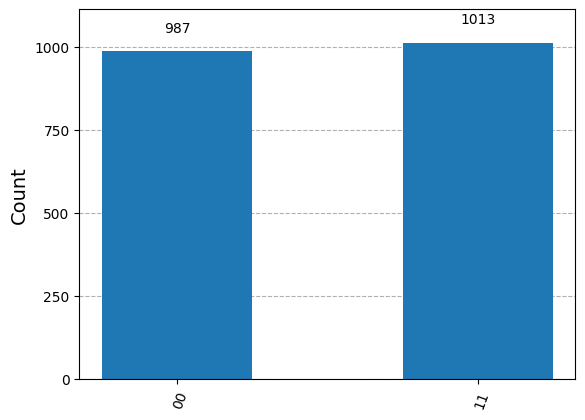

In [43]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In many cases, it can be useful to evaluate the circuit with different input states, for example to build the corresponding truth table. Let's define a list of possible initializations: we can simply use an identity matrix to represent all possible input states. 

In [2]:
from numpy import eye

istates = eye(4); 
istr = ['00','01','10','11'];
print(istates)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


We can now simulate the circuit for all different input states. Notice that in general, we do not need to check for job completion before fetching results, since `.result()` is a blocking method. 

In [8]:
from qiskit.providers import JobStatus

counts = {};
for i in range(istates.shape[1]):
    circ = QuantumCircuit(2,2); 
    circ.initialize(istates[i],[0,1]); 
    circ.h(0); 
    circ.x(1); 
    circ.cx(0,1); 
    circ.measure(0,0); 
    circ.measure(1,1); 

    job = backend.run(circ, shots=2000);
    result = job.result();
    counts[istr[i]] = result.get_counts(); 

counts

{'00': {'10': 976, '01': 1024},
 '01': {'10': 983, '01': 1017},
 '10': {'11': 1013, '00': 987},
 '11': {'11': 994, '00': 1006}}

We can compare the measurement results with the expected output state vectors computed using `Statevector`. Notice that similarly to the `Operator` object, also the `Statevector` object has two accessible properties, namely `data` and `dims`. The coefficients $\alpha_{00}, \alpha_{01}, \alpha_{10}, \alpha_{11}$ of the state are stored in the `data` attribute. 

In [47]:
circ = QuantumCircuit(2,2); 
circ.h(0); 
circ.x(1); 
circ.cx(0,1); 

ostates = {};
for i in range(istates.shape[1]):
    ostates[istr[i]] = Statevector(istates[i]).evolve(circ).data; 
    
ostates

{'00': array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j]),
 '01': array([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,  0.        +0.j]),
 '10': array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j]),
 '11': array([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j])}

Notice that measurements for initial states $|00\rangle$ and $|01\rangle$ both show an equal probability of measuring $|01\rangle$ and $|10\rangle$, and similarly initial states $|10\rangle$ and $|11\rangle$ yield almost equal probabilites for the output states $|00\rangle$ and $|10\rangle$. Comparing this result with the `Statevector` results, we can see that some phase information is lost in the projective measurement.

# Running circuits on quantum hardware <a class="anchor" id="running-circuits"></a>
Up to now we have only used Qiskit to perform simulations of our quantum circuit: we will now deploy it on a quantum hardware. The procedure is similar to using the `AerSimulator`: we will need to connect to a `Backend` and then launch our `Job`, which upon completion can be queried for `Result`s. The only difference with `AerSimulator` is that the `Backend` is now a physical a quantum processor, composed of a number of interconnected qubits. Different backends are available from IBM with differing numbers of qubits, ranging from 1 to 127. Available backends can be checked on the [Compute Resources](https://quantum-computing.ibm.com/services/resources) page, or using the `.backends(kwargs)` method. Additional kwargs can be used to filter the backend list:
- `simulator=False` allows to return only real quantum processors
- `operational=True` allows to return only quantum processors in operational state

In [48]:
from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="YOUR_IBM_QUANTUM_TOKEN",overwrite=True);

service = QiskitRuntimeService(channel='ibm_quantum')
print(service.backends())

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


Connection to a backend can then be established using the `.get_backend(name)` method, where `name` is the corresponding backend name. For example, let's connect to the IBM Kyiv backend, a 127-qubit Eagle r3 quantum processor. 

In [49]:
backend = service.backend("ibm_kyiv"); 
print(backend)
print(backend.coupling_map)

<IBMBackend('ibm_kyiv')>
[[0, 1], [0, 14], [1, 2], [2, 3], [4, 3], [4, 15], [5, 4], [6, 5], [7, 6], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [13, 12], [14, 18], [16, 8], [17, 12], [17, 30], [19, 18], [20, 19], [21, 20], [21, 22], [22, 15], [22, 23], [23, 24], [24, 25], [26, 16], [26, 25], [26, 27], [28, 27], [29, 28], [29, 30], [31, 30], [31, 32], [33, 20], [33, 39], [34, 24], [35, 28], [35, 47], [36, 32], [36, 51], [37, 38], [37, 52], [39, 38], [40, 39], [40, 41], [42, 41], [42, 43], [43, 34], [44, 43], [45, 44], [45, 46], [46, 47], [48, 47], [48, 49], [50, 49], [50, 51], [53, 41], [53, 60], [54, 45], [54, 64], [55, 49], [56, 52], [57, 56], [57, 58], [58, 59], [58, 71], [59, 60], [60, 61], [61, 62], [63, 62], [63, 64], [64, 65], [66, 65], [66, 67], [67, 68], [68, 55], [68, 69], [69, 70], [70, 74], [72, 62], [72, 81], [73, 66], [73, 85], [75, 76], [75, 90], [76, 77], [77, 71], [77, 78], [79, 78], [80, 79], [80, 81], [82, 81], [82, 83], [84, 83], [85, 84], [85, 86], [87, 86], [87, 9

If we don't have particular requirements on the quantum processor to use, we can simply pick the least busy backend by using the `least_busy(blist)` function. Argument `blist` is a list of backends, for example the one output by the `.backends()` method. For example, let's connect to the least busy, operational backend based on a real quantum processor: 

In [50]:
backend = service.least_busy(); 
print(backend)

<IBMBackend('ibm_brisbane')>


When a circuit built in Qiskit is deployed on the desired backend, its execution is scheduled in a global queue. While the execution time of any quantum algorithm is typically very short, the wait time in the queue can become long. For testing purposes, `FakeBackend`s are also available. `FakeBackend`s are `AerSimulator`-driven backends built from historical IBM backend data, mimicking the behavior of a real backend.

In [51]:
from qiskit.providers.fake_provider import GenericBackendV2
backend = GenericBackendV2(num_qubits=5);
print(backend)
print(backend.coupling_map)

[[0, 1], [1, 0], [0, 2], [2, 0], [0, 3], [3, 0], [0, 4], [4, 0], [1, 2], [2, 1], [1, 3], [3, 1], [1, 4], [4, 1], [2, 3], [3, 2], [2, 4], [4, 2], [3, 4], [4, 3]]


Let's now operate our quantum circuit on the quantum hardware. For the moment, we stick to our `FakeBackend`. We build the circuit as usual: 

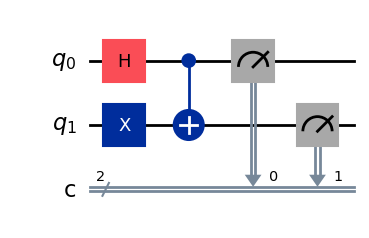

In [52]:
circ = QuantumCircuit(2,2); 
circ.h(0); 
circ.x(1); 
circ.cx(0,1); 
circ.measure(0,0); 
circ.measure(1,1); 
circ.draw("mpl")

In real quantum processors, not all gates are physically implemented; quite the opposite, each quantum processor typically implements just a few quantum gates which constitute a universal set. We can check the basis gates implemented in a backend by inspecting the `operations` attribute:

In [53]:
print(backend.operations)

[Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), Instruction(name='id', num_qubits=1, num_clbits=0, params=[]), Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]), Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]), Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]), Delay(duration=t[unit=dt]), Instruction(name='measure', num_qubits=1, num_clbits=1, params=[])]


Notice that in the default `FakeBackend` the Hadamard gate is not natively implemented as a basis gate. In order to execute our circuit in the quantum processor, we need to transform gates which are not realized at the physical level in equivalent combinations of physically-implemented gates. This process is handled by the `Transpiler` and can be executed by calling the `transpile(circuit,backend)` function and passing the `QuantumCircuit` and `Backend` objects as arguments. The returned object is a new `QuantumCircuit` reflecting the configuration of our backend and only featuring physically-implemented basis gates. In principle, even when working with the `AerSimulator`, we should always transpile our circuit before running jobs. 

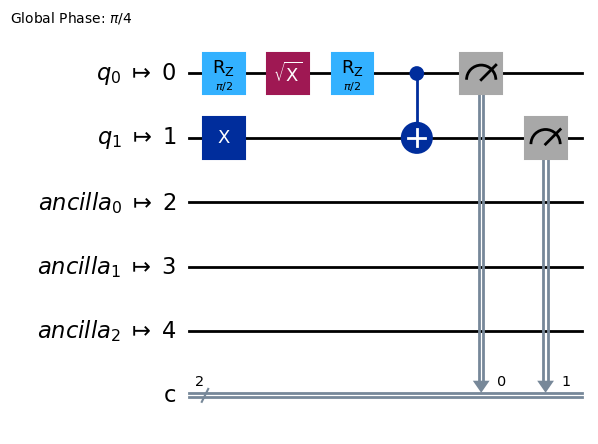

In [54]:
from qiskit import transpile 

tcirc = transpile(circ,backend); 
tcirc.draw("mpl")

We can now run our transpiled circuit in the backend by using the `.run()` method, similarly to how we did with `AerSimulator`.

In [55]:
job = backend.run(tcirc, shots=2000)

In real quantum hardware, `Job`s from users all around the world are not executed instantly, but scheduled in queues on the desired quantum processor. We can check the current status of our `Job` using the `.status()` method, which can return one of the following values: 

- `INITIALIZING = 'job is being initialized'`
- `QUEUED = 'job is queued'`
- `VALIDATING = 'job is being validated'`
- `RUNNING = 'job is actively running'`
- `CANCELLED = 'job has been cancelled'`
- `DONE = 'job has successfully run'`
- `ERROR = 'job incurred error'`

In [56]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

Result fetching is identical to the `AerSimulator` case:

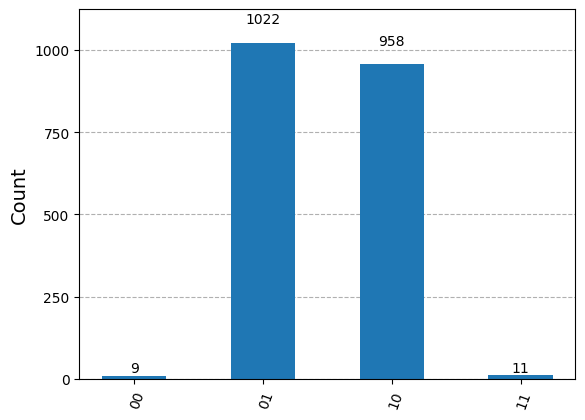

In [57]:
result = job.result(); 
counts = result.get_counts()
plot_histogram(counts)

Notice how the results differ from the pure `AerSimulator` case, now including some unexpected measurements of the $|00\rangle$ and $|11\rangle$ states. This is due to `FakeBackend`s including additional informations on noise and gate errors.

As a last example, let's deploy our circuit on a real quantum processor. Our two-qubit circuit does not have particular requirements, so we can just pick the least busy backend, transpile our circuit, and run the job: 

In [58]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
backend = service.least_busy(); 
tcirc = transpile(circ,backend); 
sampler = Sampler(backend);
job = sampler.run([tcirc],shots=2000);

We can check the current status of the job using either the `.result()` method, or from the [IBM Quantum Platform Dashboard](https://quantum-computing.ibm.com/).

In [59]:
job.status()

'RUNNING'

The `QUEUED` state signals our job has been placed in the execution queue. To automatically fetch results upon completion, we can just call the `.result()` method, which is implemented in a blocking manner, *i.e.* it does not return until either the job is completed or a timeout is reached. With a bit of luck, we may see the result in the next couple of minutes. 

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=2000, num_bits=2>)), metadata={'circuit_metadata': {}})
 > Counts: {'01': 975, '10': 851, '00': 98, '11': 76}


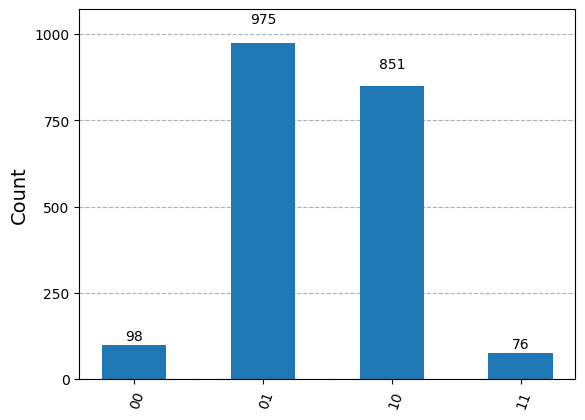

In [61]:
result = job.result(); 
print(result[0])
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")
plot_histogram(counts)